(357, 2)
(357, 2)


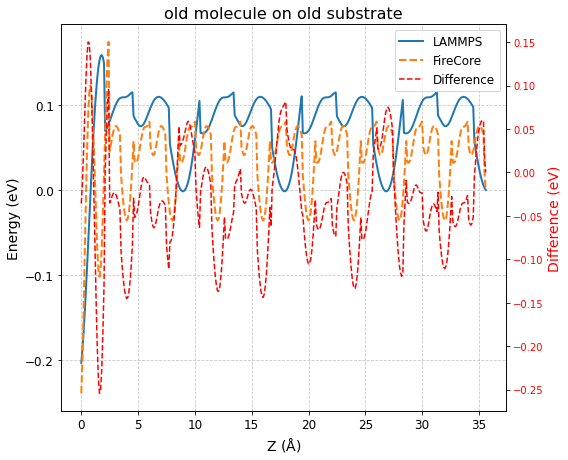

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# --- Single Comparison Plot ---

def plot_single_comparison(lammps_file, firecore_file, title, x_range=None, y_range=None):
    lammps_data = np.loadtxt(lammps_file)
    firecore_data = np.loadtxt(firecore_file)


    plt.figure(figsize=(8, 6))
    plt.plot(lammps_data[:, 0], lammps_data[:, 1], linewidth=2, label='LAMMPS')
    plt.plot(firecore_data[:, 0], firecore_data[:, 1], marker='o', markersize=10, linestyle='', label='FireCore',markerfacecolor='none')

    plt.xlabel('Z (Angstroms)', fontsize=14)
    plt.ylabel('Energy (eV)', fontsize=14)
    plt.title(title, fontsize=16)

    if y_range:
        plt.ylim(y_range)

    if x_range:
        plt.xlim(x_range)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    return plt

def plot_single_comparison_error(lammps_file, firecore_file, title, x_range=None, y_range=None, error_range=None):
    lammps_data = np.loadtxt(lammps_file)
    firecore_data = np.loadtxt(firecore_file)
    print(lammps_data.shape)
    print(firecore_data.shape)

    # Calculate the difference between FireCore and LAMMPS data
    difference_data = firecore_data[:, 1] - lammps_data[:, 1]

    # Create figure with primary y-axis
    fig, ax1 = plt.subplots(figsize=(8, 6.5))
    
    # Plot LAMMPS and FireCore data on primary y-axis
    ax1.plot(lammps_data[:, 0], lammps_data[:, 1], linewidth=2, label='LAMMPS')
    ax1.plot(firecore_data[:, 0], firecore_data[:, 1], 
             linestyle='--', linewidth=2,label='FireCore') #marker='o', markersize=10, markerfacecolor='none',
    
    # Set labels and title for primary axis
    ax1.set_xlabel(r'Z ($\mathrm{\AA}$)', fontsize=14)
    ax1.set_ylabel('Energy (eV)', fontsize=14)
    ax1.set_title(title, fontsize=16)
    
    # Apply range limits if provided
    if y_range:
        ax1.set_ylim(y_range)
    if x_range:
        ax1.set_xlim(x_range)
    
    # Create secondary y-axis for error data
    ax2 = ax1.twinx()
    
    # Plot difference data on secondary y-axis
    ax2.plot(firecore_data[:, 0], difference_data,
             linestyle='--',  markerfacecolor='none',color='r', label='Difference')
    
    # Set labels and title for secondary axis
    ax2.set_ylabel('Difference (eV)', fontsize=14, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    

    # Set range for error axis if provided
    if error_range:
        ax2.set_ylim(error_range)
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='best')
    
    # Formatting
    ax1.tick_params(axis='both', labelsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt

def plot_3_comparison_errors(lammps_file,lammps_file_1, firecore_file, title, x_range=None, y_range=None, error_range=None):
    lammps_data = np.loadtxt(lammps_file)
    lammps_data_1 = np.loadtxt(lammps_file_1)
    firecore_data = np.loadtxt(firecore_file)
    print(lammps_data.shape)
    print(firecore_data.shape)

    # Calculate the difference between FireCore and LAMMPS data
    difference_data1 = firecore_data[:, 1] - lammps_data[:, 1]
    difference_data2 = firecore_data[:, 1] - lammps_data_1[:, 1]
    difference_data3 = lammps_data_1[:, 1] - lammps_data[:, 1]

    # Create figure with primary y-axis
    fig, ax1 = plt.subplots(figsize=(8, 6.5))
    
    # Plot LAMMPS and FireCore data on primary y-axis
    ax1.plot(lammps_data[:, 0], lammps_data[:, 1], linewidth=2, label='CPU Grid')
    ax1.plot(lammps_data[:, 0], lammps_data_1[:, 1], linewidth=5, label='GPU Grid',linestyle='--')
    ax1.plot(firecore_data[:, 0], firecore_data[:, 1], marker='o', markersize=10, 
             linestyle='', label='All atoms', markerfacecolor='none')
    
    # Set labels and title for primary axis
    ax1.set_xlabel(r'Z ($\mathrm{\AA}$)', fontsize=14)
    ax1.set_ylabel('Energy (eV)', fontsize=14)
    ax1.set_title(title, fontsize=16)
    
    # Apply range limits if provided
    if y_range:
        ax1.set_ylim(y_range)
    if x_range:
        ax1.set_xlim(x_range)
    
    # Create secondary y-axis for error data
    ax2 = ax1.twinx()
    
    # Plot difference data on secondary y-axis
    ax2.plot(firecore_data[:, 0], difference_data1, marker='*', markersize=5, 
             linestyle='',  markerfacecolor='none',color='r', label='All atoms - CPU')
    ax2.plot(firecore_data[:, 0], difference_data2, marker='*', markersize=5, 
             linestyle='',  markerfacecolor='none',color='g', label='All atoms - GPU')
    ax2.plot(firecore_data[:, 0], difference_data3, marker='*', markersize=5, 
             linestyle='',  markerfacecolor='none',color='b', label='CPU - GPU')
    
    # Set labels and title for secondary axis
    ax2.set_ylabel('Difference (eV)', fontsize=14, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    

    # Set range for error axis if provided
    if error_range:
        ax2.set_ylim(error_range)
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc='center left')
    
    # Formatting
    ax1.tick_params(axis='both', labelsize=12)
    ax1.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    return plt

# --- Multiple Comparison Plot ---

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/morse.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Morse.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/coul.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Coulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/total.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Morse_Coulomb.dat' # Replace with your actual file path

# plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "NaCl molecule on Na atom of NaCl Substarte",error_range=(-3e-8, 7.5e-8))


# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/morse.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Morse.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/coul.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Coulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/total.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Morse_Coulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/morse.dat'  # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/coul.dat'  # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/total.dat'  # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/morse.dat'  # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/coul.dat'  # Replace with your actual file path
# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/old_substrate_total.dat'
# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/paolo_new_substrate_total.dat'  # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/old_mol_old_sub_total.dat' # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/new_mol_old_sub_total.dat' # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/new_mol_new_sub_total.dat' # Replace with your actual file path
# lammps_file = '/home/indranil/Documents/Project_1/Lammps/1-rigid_zscan/old_mol_new_sub_total.dat' # Replace with your actual file path

firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/PTCDA_data_trial_1d_relax_line/old_mol_old_sub_PTCDA_total.dat'
lammps_file = '/home/indranil/Documents/Project_1/Lammps/4-relaxed_linescan/total.dat'
lammps_file_modified = '/home/indranil/git/FireCore/tests/tMMFF/PTCDA_data_trial_1d_relax_line/old_mol_old_sub_PTCDA_total_modified.dat'
data = np.loadtxt(lammps_file)
second_column = data[:, 1]
last_value_second_column = second_column[-1]
modified_second_column = second_column - last_value_second_column
data[:, 1] = modified_second_column
np.savetxt(lammps_file_modified, data)
lammps_file = lammps_file_modified

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-relaxed_zscan/total.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/PTCDA_data_trial_1d_relax_z/old_mol_old_sub_PTCDA_total.dat'

# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/all_atom_E_z_scan_on_Na_PTCDA_Morse.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/all_atom_E_z_scan_on_Na_PTCDA_Morse.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Morse.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Coulomb.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat' # Replace with your actual file path

# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/uff_E_z_scan_on_Na_PTCDA_Morse.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/uff_E_z_scan_on_Na_PTCDA_Coulomb.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/new2_final_uff_E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/morse_new2_final_uff_E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/coul_new2_final_uff_E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/new_substrate_total.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/new_molecule_substrate_total.dat' # Replace with your actual file path

# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/old_mol_old_sub_total.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/new_mol_old_sub_total.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/new_mol_new_sub_total.dat' # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/old_mol_new_sub_total.dat' # Replace with your actual file path


# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/test_cpu_uff_E_z_scan_on_Na_PTCDA_Coulomb.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/test_gpu_uff_E_z_scan_on_Na_PTCDA_Coulomb.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/-1test_gpu_uff_E_z_scan_on_Na_PTCDA_Coulomb.dat'

# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/test_gpu_uff_E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/test_cpu_uff_E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat'

# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/test_gpu_uff_E_z_scan_on_Na_PTCDA_Coulomb.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/test_cpu_uff_E_z_scan_on_Na_PTCDA_Coulomb.dat'

# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/test_gpu_uff_E_z_scan_on_Na_PTCDA_Morse.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/test_cpu_uff_E_z_scan_on_Na_PTCDA_Morse.dat'



# lammps_file = '/home/indranil/git/FireCore/tests/tMMFF/cpu_xy_E_z_scan_on_Na_O_Morse.dat'
# lammps_file_1 = '/home/indranil/git/FireCore/tests/tMMFF/gpu_xy_E_z_scan_on_Na_O_Morse.dat'
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/all_xy_E_z_scan_on_Na_O_Morse.dat'

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/coul.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Coulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/total.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_MCoulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/3-zscan_on_hollow/morse.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_PTCDA_Morse.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/3-zscan_on_hollow/coul.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_mol_NaCl_Coulomb.dat' # Replace with your actual file path

# lammps_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/3-zscan_on_hollow/total.dat'  # Replace with your actual file path
# firecore_file = '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_mol_NaCl_Morse_Coulomb.dat' # Replace with your actual file path

# plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "old molecule on old substrate") # Compare 2 files
# plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "new molecule on old substrate") # Compare 2 files
# plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "new molecule on new substrate") # Compare 2 files
plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "old molecule on old substrate") # Compare 2 files


# plt_c_na = plot_3_comparison_errors(lammps_file,lammps_file_1, firecore_file, "H2O molecule on Na atom of NaCl_1x1_L1 Substarte ") # Compare three files

# plt_c_na = plot_single_comparison(lammps_file, firecore_file, "NaCl_mol on hollow")
# plt_c_na = plot_single_comparison_error(lammps_file, firecore_file, "NaCl molecule on Na atom of NaCl Substarte",error_range=(-3e-8, 7.5e-8))


plt.show() # Uncomment if you want to display the plot

# 3 panel 1D z scan comaparison plot

In [2]:
def plot_multiple_comparisons(data_pairs, titles, output_filename, x_range=None, y_ranges=None, error_ranges=None):
    """
    Create a figure with multiple comparison plots in a single row.
    """
    # Create the main figure
    n_plots = len(data_pairs)
    fig = plt.figure(figsize=(6*n_plots, 6))
    
    # Default ranges if not provided
    if y_ranges is None:
        y_ranges = [None] * n_plots
    if error_ranges is None:
        error_ranges = [None] * n_plots
    
    # Process each plot
    for i in range(n_plots):
        # Get data for this pair
        lammps_file, firecore_file = data_pairs[i]
        title = titles[i]
        y_range = y_ranges[i] if y_ranges else None
        error_range = error_ranges[i] if error_ranges else None
        
        # Create subplot
        ax1 = fig.add_subplot(1, n_plots, i+1)
        
        # Load data
        lammps_data = np.loadtxt(lammps_file)
        firecore_data = np.loadtxt(firecore_file)
        
        # Calculate difference
        difference_data = firecore_data[:, 1] - lammps_data[:, 1]
        
        # Plot on primary axis
        ax1.plot(lammps_data[:, 0], lammps_data[:, 1], linewidth=2, label='LAMMPS')
        ax1.plot(firecore_data[:, 0], firecore_data[:, 1], marker='o', markersize=8, 
                linestyle='', label='FireCore', markerfacecolor='none')
        
        # Set labels and title
        ax1.set_xlabel(r'Z ($\mathrm{\AA}$)', fontsize=12)
        if i == 0:  # Only add y-label to the first subplot
            ax1.set_ylabel('Energy (eV)', fontsize=12)
        ax1.set_title(title, fontsize=14)
        
        # Apply range limits
        if y_range:
            ax1.set_ylim(y_range)
        if x_range:
            ax1.set_xlim(x_range)
        
        # Secondary axis for difference data
        ax2 = ax1.twinx()
        ax2.plot(firecore_data[:, 0], difference_data, marker='*', markersize=5, 
                linestyle='', color='r', label='Difference')
        
        # Set secondary y-axis label only for the last subplot
        if i == n_plots - 1:
            ax2.set_ylabel('Difference (eV)', fontsize=12, color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        
        # Set error range
        if error_range:
            ax2.set_ylim(error_range)
        
        # Add legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=10, loc='best')
        
        # Grid
        ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout and save
    plt.tight_layout()
    # plt.savefig(output_filename, dpi=600, bbox_inches='tight')
    
    return fig

# # Example usage: NaCl 
# data_pairs_0 = [
#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/morse.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Morse.dat'),
    
#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/coul.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Coulomb.dat'),
    
#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/1-zscan_on_Na/total.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_mol_NaCl_Morse_Coulomb.dat')
# ]

# data_pairs_1 = [
#     ( '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/morse.dat' ,
#     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Morse.dat'), 

#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/coul.dat' ,
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Coulomb.dat'),
     
#      ( '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/2-zscan_on_Cl/total.dat', 
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_mol_NaCl_Morse_Coulomb.dat')]

# data_pairs_2 = [
#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/3-zscan_on_hollow/morse.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_mol_NaCl_Morse.dat'),

#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/3-zscan_on_hollow/coul.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_mol_NaCl_Coulomb.dat'),

#     ('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/3-zscan_on_hollow/total.dat',
#      '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_mol_NaCl_Morse_Coulomb.dat')]


# titles = [
#     "Morse Potential",
#     "Coulomb Potential",
#     "Total Potential"
# ]

# error_ranges = [(-3e-8, 7.5e-8), (-3e-5, 7.5e-4), (-3e-5, 7.5e-4)]
# error_ranges = [(-3e-8, 7.5e-8), (-9e-4, 1e-4), (-9e-4, 1e-4)]
# error_ranges = [(-7e-8, 7e-8), (-8e-4, 8e-4), (-8e-4, 8e-4)]

##Create and save the combined figure
# fig = plot_multiple_comparisons(
#     data_pairs_2, 
#     titles, 
#     '/home/indranil/Documents/Project_1/results/NaCl_mol_on_hollow_comparison.eps',
#     error_ranges=error_ranges
# )

# Example usage: PTCDA 
data_pairs_0 = [
    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/morse.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Morse.dat'),
    
    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/coul.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Coulomb.dat'),
    
    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/1-zscan_on_Na/total.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Na_PTCDA_Morse_Coulomb.dat')
]

data_pairs_1 = [
    ( '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/2-zscan_on_Cl/morse.dat' ,
    '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_PTCDA_Morse.dat'), 

    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/2-zscan_on_Cl/coul.dat' ,
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_PTCDA_Coulomb.dat'),
     
     ( '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/2-zscan_on_Cl/total.dat', 
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_Cl_PTCDA_Morse_Coulomb.dat')]

data_pairs_2 = [
    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/3-zscan_on_hollow/morse.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_PTCDA_Morse.dat'),

    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/3-zscan_on_hollow/coul.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_PTCDA_Coulomb.dat'),

    ('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/3-zscan_on_hollow/total.dat',
     '/home/indranil/git/FireCore/tests/tMMFF/E_z_scan_on_hollow_PTCDA_Morse_Coulomb.dat')]


titles = [
    "Morse Potential",
    "Coulomb Potential",
    "Total Potential"
]

error_ranges = [(-3e-6, 4e-6), (-9.5e-5, 1.5e-5), (-6e-5, 8e-5)]
# error_ranges = [(-3e-6, 3e-6), (-1.5e-5, 1e-4), (-6e-5, 8e-5)]
# error_ranges = [(-9.5e-6, 7e-6), (-8e-4, 1e-4), (-8e-4, 1e-4)]

#Create and save the combined figure
fig = plot_multiple_comparisons(
    data_pairs_0, 
    titles, 
    '/home/indranil/Documents/Project_1/results/new_PTCDA_on_Na_comparison.eps',
    error_ranges=error_ranges
)



# Display the figure
plt.show()

NameError: name 'plt' is not defined

# 2D Scan Plot and Comparison

Data coditioning 

In [55]:
# # # # # Input and output file paths NaCl
# # input_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/morse.dat'
# # output_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/morse_no_blank.dat'

# # # input_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/coul.dat'
# # # output_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/coul_no_blank.dat'

# # # # input_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/total.dat'
# # # # output_file = '/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/total_no_blank.dat'


# ########PTCDA 
# # input_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/morse.dat'
# # output_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/morse_no_blank.dat'

# input_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/coul.dat'
# output_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/coul_no_blank.dat'

input_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/total.dat'
output_file = '/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/total_no_blank.dat'


# # # Read the input file and write non-blank lines to the output file
with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
    for line in f_in:
        if line.strip():  # Check if the line is not empty after stripping whitespace
            f_out.write(line)

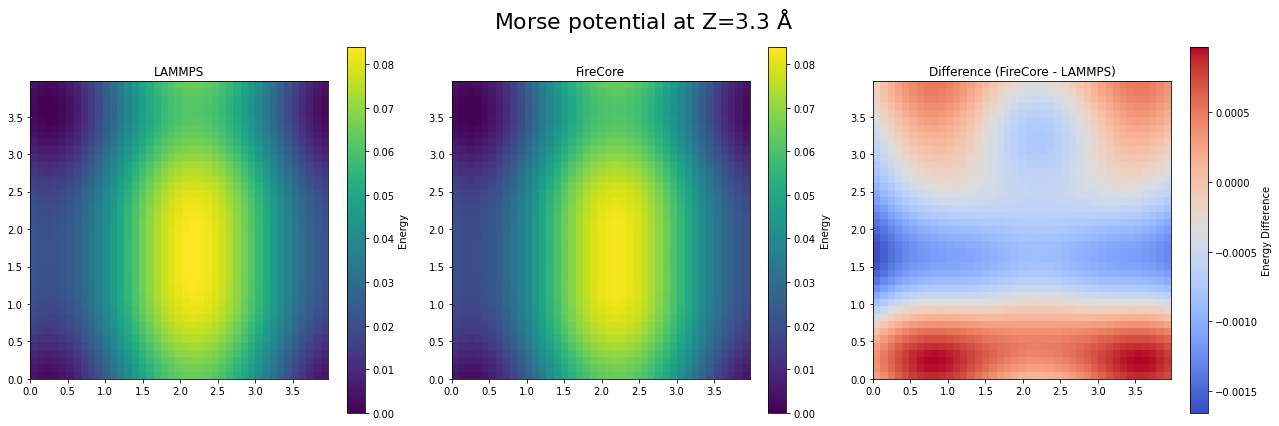

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load data from files
# lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Paolo/Final_molNaCl/4-xyscan/total_no_blank.dat') #/home/indranil/Documents/Project_1/Paolo/Conly_2/pes_xy_no_blank_cut20.dat
# firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_mol_NaCl_Morse_Coulomb.dat')  #/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_C_direct.dat

lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Lammps/2-rigid_xyscan/morse_no_blank.dat') 
firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/PTCDA_data_trial/new_mol_old_sub_PTCDA_morse_2d.dat') 

# lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/morse_no_blank.dat') 
# firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_PTCDA_Morse.dat') 

# lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/coul_no_blank.dat') 
# firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_PTCDA_Coulomb.dat') 


# lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Lammps/3-rigid_PES/4-xyscan/total_no_blank.dat') 
# firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_PTCDA_Morse_Coulomb.dat') 


firecore_data[:,2] -=min(firecore_data[:,2])   ### In LAMMPs all the data are scalled with absolute values that is why

# Extract x, y, and energy values
x_lammps, y_lammps, e_lammps = lammps_data[:, 0], lammps_data[:, 1], lammps_data[:, 2]
x_firecore, y_firecore, e_firecore = firecore_data[:, 0], firecore_data[:, 1], firecore_data[:, 2]

# Reshape data into 2D grids for plotting
# Assuming the x and y values are on a regular grid
nx = len(np.unique(x_lammps))
ny = len(np.unique(y_lammps))
e_lammps_grid = e_lammps.reshape(ny, nx)
e_firecore_grid = e_firecore.reshape(ny, nx)

# Calculate the difference
difference_grid = e_firecore_grid - e_lammps_grid

# Set vmin and vmax for LAMMPS and FireCore plots
vmin = min(np.min(e_lammps_grid), np.min(e_firecore_grid))
vmax = max(np.max(e_lammps_grid), np.max(e_firecore_grid))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot LAMMPS data
im1 = axes[0].imshow(e_lammps_grid, extent=(x_lammps.min(), x_lammps.max(), y_lammps.min(), y_lammps.max()),
                     origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
axes[0].set_title('LAMMPS')
fig.colorbar(im1, ax=axes[0], label='Energy')

# Plot FireCore data
im2 = axes[1].imshow(e_firecore_grid, extent=(x_firecore.min(), x_firecore.max(), y_firecore.min(), y_firecore.max()),
                     origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
axes[1].set_title('FireCore')
fig.colorbar(im2, ax=axes[1], label='Energy')

# Plot difference (FireCore - LAMMPS)
im3 = axes[2].imshow(difference_grid, extent=(x_lammps.min(), x_lammps.max(), y_lammps.min(), y_lammps.max()),
                     origin='lower', cmap='coolwarm')
axes[2].set_title('Difference (FireCore - LAMMPS)')
fig.colorbar(im3, ax=axes[2], label='Energy Difference')

fig.suptitle(r"Morse potential at Z=3.3 $\mathrm{\AA}$ ", fontsize=22)  # Overall title for the figure

##******* NaCl
# output_filename = '/home/indranil/Documents/Project_1/results/NaCl_xy_Morse.eps'
# output_filename = '/home/indranil/Documents/Project_1/results/NaCl_xy_Coulomb.eps'
# output_filename = '/home/indranil/Documents/Project_1/results/NaCl_xy_total.eps'


###******* PTCDA
# output_filename = '/home/indranil/Documents/Project_1/results/PTCDA_xy_Morse.eps'
# output_filename = '/home/indranil/Documents/Project_1/results/PTCDA_xy_Coulomb.eps'
# output_filename = '/home/indranil/Documents/Project_1/results/PTCDA_xy_total.eps'

# Adjust layout and show plot
# plt.tight_layout()
 # Adjust layout and save
plt.tight_layout()
# plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()

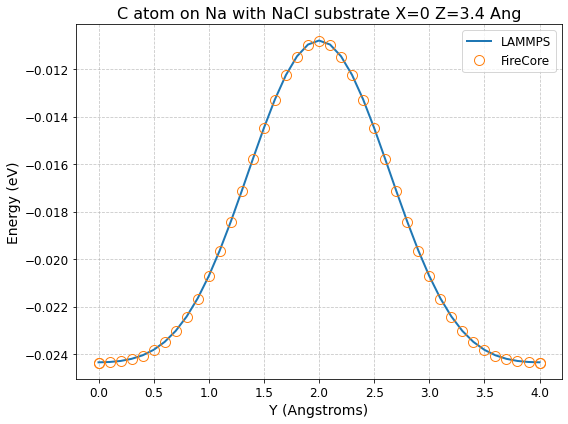

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# --- Single Comparison Plot ---

def plot_single_comparison(lammps_file, firecore_file, title, x_range=None, y_range=None,lammps_skip_interval=0,firecore_skip_interval=0):
    lammps_data = np.loadtxt(lammps_file)
    firecore_data = np.loadtxt(firecore_file)

    firecore_data_skipped = firecore_data[::firecore_skip_interval]
    lammps_data_skipped = lammps_data[::lammps_skip_interval]

    plt.figure(figsize=(8, 6))
    plt.plot(lammps_data_skipped[:, 0], lammps_data_skipped[:, 2], linewidth=2, label='LAMMPS')
    plt.plot(firecore_data_skipped[:, 0], firecore_data_skipped[:, 2], marker='o', markersize=10, linestyle='', label='FireCore',markerfacecolor='none')

    plt.xlabel('Y (Angstroms)', fontsize=14)
    plt.ylabel('Energy (eV)', fontsize=14)
    plt.title(title, fontsize=16)

    if y_range:
        plt.ylim(y_range)

    if x_range:
        plt.xlim(x_range)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    return plt


# Example usage for single plot:
lammps_c_na_file = '/home/indranil/Documents/Project_1/Paolo/Conly_2/pes_xy_no_blank.dat'  # Replace with your actual file path

firecore_c_na_file = '/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_C.dat' # Replace with your actual file path

plt_c_na = plot_single_comparison(lammps_c_na_file, firecore_c_na_file, "C atom on Na with NaCl substrate X=0 Z=3.4 Ang",  lammps_skip_interval=40, firecore_skip_interval=40) #x_range=(2.5, 8), y_range=(-0.03, 0.01)
# plt_c_na.savefig("c_na_comparison.png", dpi=300)
# plt.show()  # Uncomment if you want to display the plot


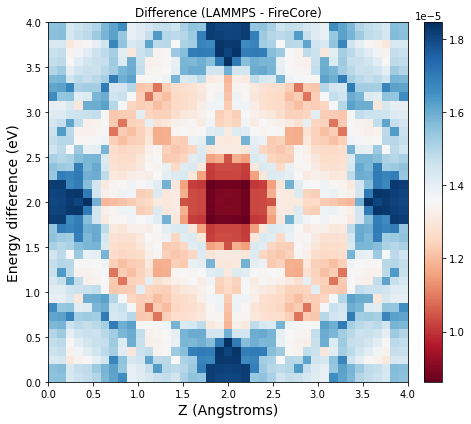

In [62]:
import matplotlib.pyplot as plt
import numpy as np


def load_data(filename):
    try:
        data = []
        expected_columns = None  # Track the number of columns from the first valid row
        
        with open(filename, 'r') as f:
            for line in f:
                stripped_line = line.strip()
                if not stripped_line:  # Skip empty lines
                    continue
                
                try:
                    # Convert line to list of floats
                    row = [float(x) for x in stripped_line.split()]
                    
                    # Check for consistent column count
                    if expected_columns is None:
                        expected_columns = len(row)
                        data.append(row)
                    else:
                        if len(row) == expected_columns:
                            data.append(row)
                        else:
                            print(f"Warning: Skipping line '{stripped_line}' (expected {expected_columns} columns, found {len(row)}).")
                except ValueError:
                    print(f"Warning: Skipping invalid line '{stripped_line}' (contains non-numeric data).")
        
        if not data:
            print(f"Error: No valid data found in '{filename}'.")
            return None
        
        return np.array(data)
    
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


def plot_comparison(file1, file2, title, x_range=None, y_range=None, difference_plot=False): # Added difference_plot parameter
    data1 = load_data(file1)
    data2 = load_data(file2)

    if data1 is None or data2 is None:
        return

    if difference_plot:  # Create the difference plot
        # Ensure data is 2D and has the correct shape for subtraction.
        if data1.ndim != 2 or data2.ndim != 2:
            print("Error: Data must be 2D for difference plot.")
            return
        if data1.shape != data2.shape:  # Check if shapes are compatible
            print("Error: Data arrays must have the same shape for difference plot.")
            return

        Z_diff = data1[:, 2] - data2[:, 2]  # Assuming the 3rd column is the Z value
        x = data1[:, 0]  # Assuming the first column is the x-axis

        plt.figure(figsize=(8, 6))
        im = plt.imshow(Z_diff.reshape(len(np.unique(x)),len(np.unique(x))), extent=[x.min(), x.max(), x.min(), x.max()], origin='lower', cmap='RdBu') #Reshape the z_diff array so that we can plot the image.
        plt.title("Difference (LAMMPS - FireCore)")  # More specific title
        plt.xlabel('Z (Angstroms)', fontsize=14)
        plt.ylabel('Energy difference (eV)', fontsize=14) # more specific label
        plt.colorbar(im, fraction=0.046, pad=0.03)
        plt.tight_layout()
        return plt

    else:  # Create the regular overlay plot
        plt.figure(figsize=(8, 6))

        if data1 is not None:
            plt.plot(data1[:, 0], data1[:, 2], linewidth=2, label='LAMMPS')

        if data2 is not None:
            plt.plot(data2[:, 0], data2[:, 2], marker='o', markersize=10, linestyle='', label='FireCore', markerfacecolor='none')

        plt.xlabel('Z (Angstroms)', fontsize=14)
        plt.ylabel('Energy (eV)', fontsize=14)
        plt.title(title, fontsize=16)

        if y_range:
            plt.ylim(y_range)

        if x_range:
            plt.xlim(x_range)

        plt.legend(fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        return plt


# Example usage for single plot:
lammps_c_na_file = '/home/indranil/Documents/Project_1/Paolo/Conly_2/pes_xy_no_blank.dat'  # Replace with your actual file path

firecore_c_na_file = '/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_C.dat' # Replace with your actual file path


# # Regular overlay plot:
# plt_overlay = plot_comparison(lammps_c_na_file, firecore_c_na_file, "C atom on Na with Single Na atom substrate", 
#                            x_range=(2.5, 8), y_range=(-0.03, 0.01))

# if plt_overlay:
#     plt_overlay.savefig("c_na_overlay.png", dpi=300)
#     plt.show()

# Difference plot:
plt_diff = plot_comparison(lammps_c_na_file, firecore_c_na_file, "Exy", 
                           difference_plot=True)  # Set difference_plot=True

# if plt_diff:
#     plt_diff.savefig("c_na_difference.png", dpi=300)
#     plt.show()

plt.show()

(1681, 3)
(1681, 3)


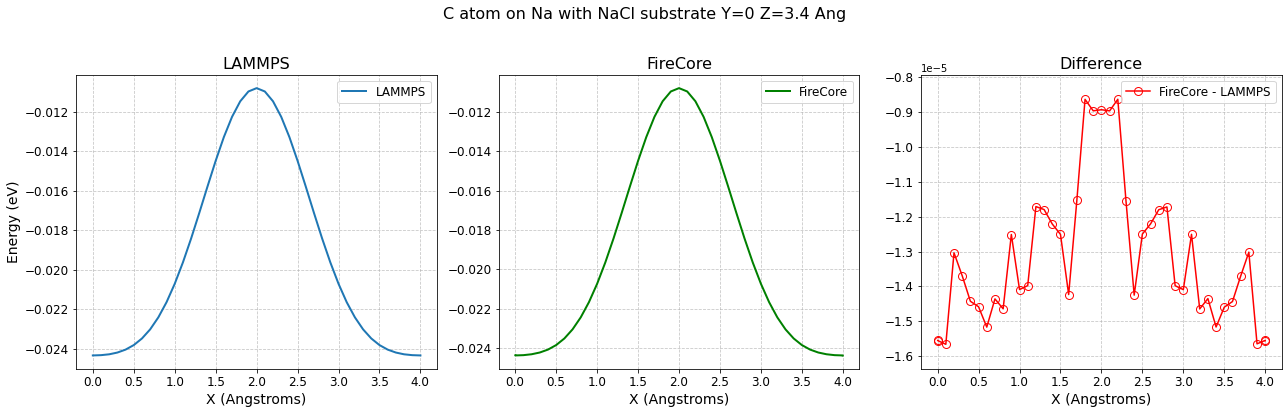

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_three_panel_comparison(lammps_file, firecore_file, title, x_range=None, y_range=None, lammps_skip_interval=0, firecore_skip_interval=0):
    lammps_data = np.loadtxt(lammps_file)
    firecore_data = np.loadtxt(firecore_file)
    print(lammps_data.shape)

    print(firecore_data.shape)

    firecore_data_skipped = firecore_data[::firecore_skip_interval]
    lammps_data_skipped = lammps_data[::lammps_skip_interval]

    # Ensure both datasets have the same x values for differencing
    min_len = min(len(lammps_data_skipped), len(firecore_data_skipped))
    lammps_data_skipped = lammps_data_skipped[:min_len]
    firecore_data_skipped = firecore_data_skipped[:min_len]

    difference_data = firecore_data_skipped[:, 2] - lammps_data_skipped[:, 2]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    # 1. LAMMPS Plot
    im1 = axes[0].plot(lammps_data_skipped[:, 0], lammps_data_skipped[:, 2], linewidth=2, label='LAMMPS')
    axes[0].set_xlabel('X (Angstroms)', fontsize=14)
    axes[0].set_ylabel('Energy (eV)', fontsize=14)
    axes[0].set_title('LAMMPS', fontsize=16)
    if y_range:
        axes[0].set_ylim(y_range)
    if x_range:
        axes[0].set_xlim(x_range)
    axes[0].tick_params(axis='both', which='major', labelsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.7)


    # 2. FireCore Plot
    im2 = axes[1].plot(firecore_data_skipped[:, 0], firecore_data_skipped[:, 2], linewidth=2, label='FireCore', markerfacecolor='none',color='green') 
    axes[1].set_xlabel('X (Angstroms)', fontsize=14)
    axes[1].set_title('FireCore', fontsize=16)
    if y_range:
        axes[1].set_ylim(y_range)
    if x_range:
        axes[1].set_xlim(x_range)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)


    # 3. Difference Plot
    im3 = axes[2].plot(lammps_data_skipped[:, 0], difference_data,  marker='o', markersize=8, linestyle='-',  label='FireCore - LAMMPS', color='red', markerfacecolor='none') 
    axes[2].set_xlabel('X (Angstroms)', fontsize=14)
    axes[2].set_title('Difference', fontsize=16)
    if x_range:
        axes[2].set_xlim(x_range)
    axes[2].tick_params(axis='both', which='major', labelsize=12)
    axes[2].grid(True, linestyle='--', alpha=0.7)

    # Automatically adjust y-axis limits for the difference plot
    min_diff = np.min(difference_data)
    max_diff = np.max(difference_data)
    range_diff = max_diff - min_diff
    axes[2].set_ylim(min_diff - 0.1 * range_diff, max_diff + 0.1 * range_diff)  # Add a small margin



    fig.suptitle(title, fontsize=16)  # Overall title for the figure
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap with suptitle

    # Add legends (optional, but good practice)
    axes[0].legend(fontsize=12)
    axes[1].legend(fontsize=12)
    axes[2].legend(fontsize=12)

    return plt



# Example usage (replace with your file paths)
lammps_c_na_file = '/home/indranil/Documents/Project_1/Paolo/Conly_2/pes_xy_no_blank.dat'
firecore_c_na_file = '/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_C.dat'

plt_c_na = plot_three_panel_comparison(lammps_c_na_file, firecore_c_na_file, "C atom on Na with NaCl substrate Y=0 Z=3.4 Ang", lammps_skip_interval=40, firecore_skip_interval=40) #x_range=(2.5, 8), y_range=(-0.03, 0.01)
#plt_c_na.savefig("c_na_comparison_3panel.png", dpi=300)
plt.show()

Surface Plot and Difference 

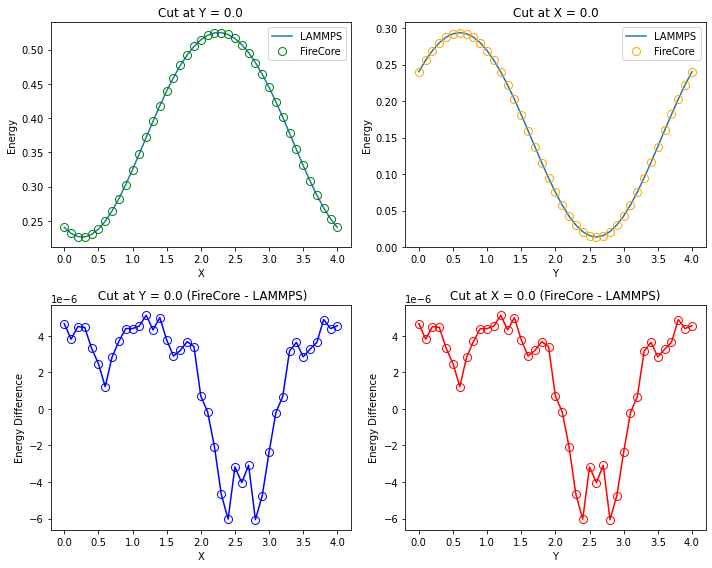

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from files
lammps_data = np.loadtxt('/home/indranil/Documents/Project_1/Paolo/pes_xy_PTCDA_no_blank.dat')
firecore_data = np.loadtxt('/home/indranil/git/FireCore/tests/tMMFF/E_xy_scan_PTCDA_NaCl.dat')
firecore_data[:,2] -=min(firecore_data[:,2])

# Extract x, y, and energy values
x_lammps, y_lammps, e_lammps = lammps_data[:, 0], lammps_data[:, 1], lammps_data[:, 2]
x_firecore, y_firecore, e_firecore = firecore_data[:, 0], firecore_data[:, 1], firecore_data[:, 2]

# --- Find unique x and y values for indexing ---
unique_x_lammps = np.unique(x_lammps)
unique_y_lammps = np.unique(y_lammps)

# --- Define y and x values for cuts ---
y_cut_value = 0.0  # Example y value for panel a and c
x_cut_value = 0.0 # Example x value for panel b and d

# --- Find indices closest to the cut values ---
y_cut_index = np.argmin(np.abs(unique_y_lammps - y_cut_value))
x_cut_index = np.argmin(np.abs(unique_x_lammps - x_cut_value))

# --- Create the 2x2 subplots ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# --- Panel a: Plot at constant y ---
mask_y = y_lammps == unique_y_lammps[y_cut_index]
x_lammps_cut = x_lammps[mask_y]
e_lammps_cut = e_lammps[mask_y]
x_firecore_cut = x_firecore[mask_y]  # Assuming x values align
e_firecore_cut = e_firecore[mask_y]

axes[0, 0].plot(x_lammps_cut, e_lammps_cut, label='LAMMPS')
axes[0, 0].plot(x_firecore_cut, e_firecore_cut, label='FireCore',marker='o', markersize=8, linestyle='',color='green', markerfacecolor='none')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].set_title(f'Cut at Y = {y_cut_value}')
axes[0, 0].legend()


# --- Panel b: Plot at constant x ---
mask_x = x_lammps == unique_x_lammps[x_cut_index]
y_lammps_cut = y_lammps[mask_x]
e_lammps_cut = e_lammps[mask_x]
y_firecore_cut = y_firecore[mask_x] # Assuming y values align
e_firecore_cut = e_firecore[mask_x]

axes[0, 1].plot(y_lammps_cut, e_lammps_cut, label='LAMMPS')
axes[0, 1].plot(y_firecore_cut, e_firecore_cut, label='FireCore',marker='o', markersize=8, linestyle='',color='orange', markerfacecolor='none')  
axes[0, 1].set_xlabel('Y')
axes[0, 1].set_ylabel('Energy')
axes[0, 1].set_title(f'Cut at X = {x_cut_value}')
axes[0, 1].legend()

# --- Panel c: Difference at constant y ---
difference_y = e_firecore_cut - e_lammps_cut
axes[1, 0].plot(x_lammps_cut, difference_y,marker='o', markersize=8, linestyle='-',color='blue', markerfacecolor='none')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Energy Difference')
axes[1, 0].set_title(f' Cut at Y = {y_cut_value} (FireCore - LAMMPS)')

# --- Panel d: Difference at constant x ---
difference_x = e_firecore_cut - e_lammps_cut
axes[1, 1].plot(y_lammps_cut, difference_x,marker='o', markersize=8, linestyle='-',color='red', markerfacecolor='none')
axes[1, 1].set_xlabel('Y')
axes[1, 1].set_ylabel('Energy Difference')
axes[1, 1].set_title(f'Cut at X = {x_cut_value} (FireCore - LAMMPS)')


plt.tight_layout()
plt.show()

# Test Plots 

In [9]:
import sys
sys.path.append('/home/indranil/git/FireCore/doc/py/')
import plot_utils as pu
import matplotlib.pyplot as plt
import numpy as np
import os

--- Qgrid Comparison ---
CPU Qgrid shape: (400, 40, 40)
GPU Qgrid shape: (400, 40, 40)
Grid dimensions (nz, ny, nx): (400, 40, 40)

Numerical Stats:
  CPU Qgrid: min=-1.1646e-01, max=1.1646e-01, mean=-6.5052e-23, std=3.0898e-04, sum_abs=1.4000e+00
  GPU Qgrid: min=-1.1646e-01, max=1.1646e-01, mean=-6.9849e-14, std=3.0898e-04, sum_abs=1.4000e+00
  Difference (GPU - CPU):
    Min Diff: -7.0583e-02
    Max Diff: 7.0583e-02
    Mean Abs Diff: 2.4063e-06
    Max Abs Diff: 7.0583e-02
    Sum of Abs Diff: 1.5400e+00
Qgrids show notable numerical differences.


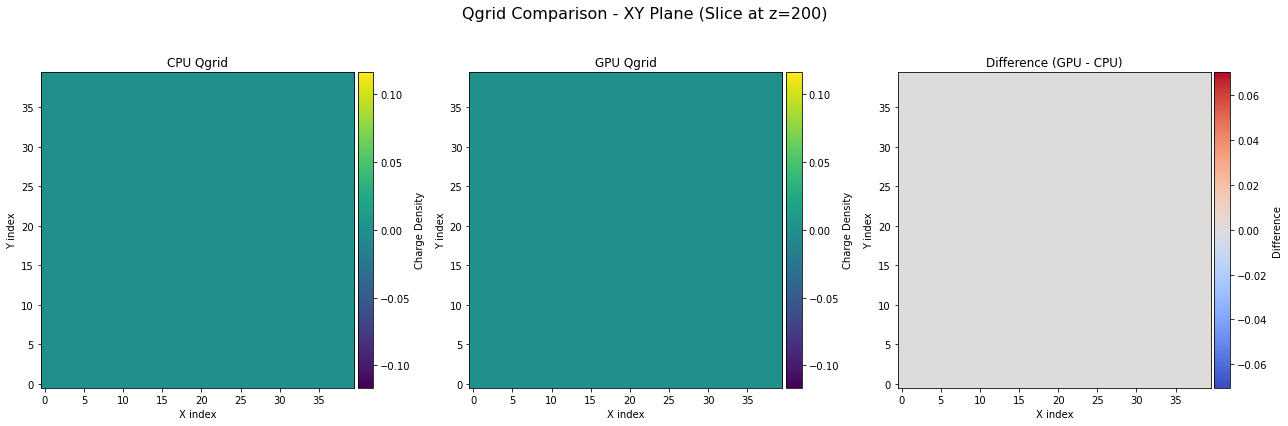

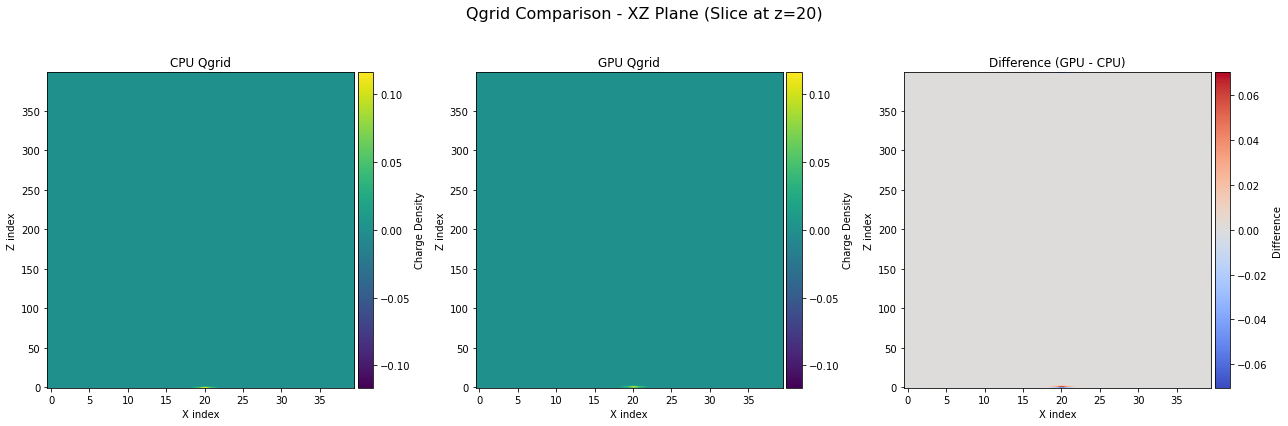

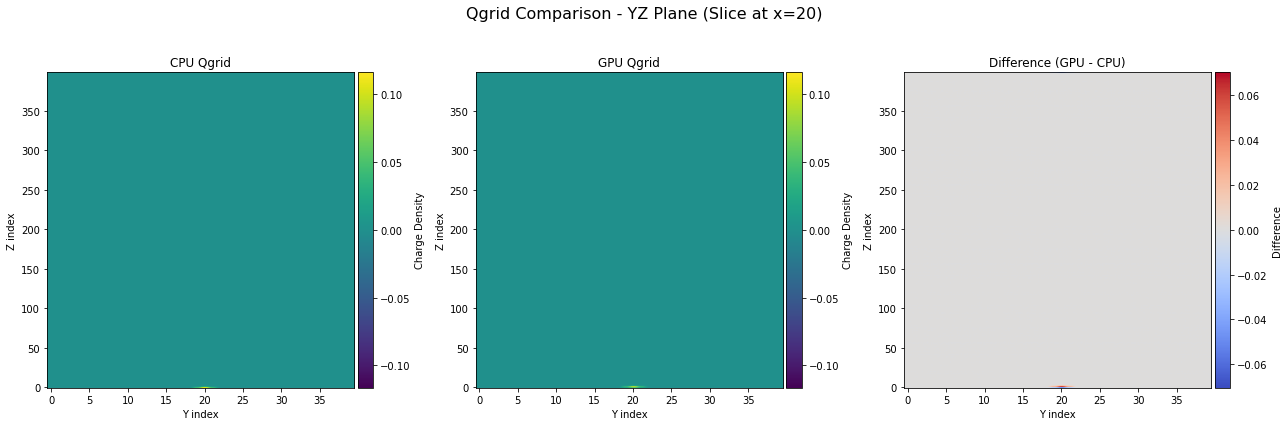

In [36]:
data_dir = "/home/indranil/git/FireCore/tests/tMMFF/data/"
nacl_dir = os.path.join(data_dir, "NaCl_1x1_L1")

qgrid_cpu = np.load(os.path.join(nacl_dir, "Qgrid.npy"))
qgrid_gpu = np.load(os.path.join(nacl_dir, "_Qgrid_gpu.npy"))


pu.compare_qgrids(qgrid_cpu, qgrid_gpu)

In [17]:
import sys
sys.path.append('/home/indranil/git/FireCore/doc/py/')
import plot_utils as pu
import importlib
importlib.reload(pu) # Reload the module

# Now try to call the function
# Assuming qgrid_cpu and qgrid_gpu are defined
# pu.print_qgrid_boundary_slices(qgrid_cpu, qgrid_gpu, num_edge_slices=3, num_line_elements=5, title_prefix="Test ")


<module 'plot_utils' from '/home/indranil/git/FireCore/doc/py/plot_utils.py'>

In [37]:



pu.print_qgrid_boundary_slices(qgrid_cpu, qgrid_gpu, num_edge_slices=3, num_line_elements=10, title_prefix="Test ")


--- Test Numerical Boundary Slice Comparison (CPU vs GPU) ---
Grid dimensions (nz, ny, nx): (400, 40, 40)
Comparing 3 slices from Z-edges.
For XZ/YZ planes, showing 11 elements around center line.
Values formatted to 6 decimal places (scientific notation if small).

--- Test XZ Plane (fixed Y=20, X indices [15:26]) ---
 Z = 0:
   CPU:   0.000000   0.000000   0.000000   0.001765   0.045879   0.116463   0.045879   0.001765   0.000000   0.000000   0.000000
   GPU:   0.000000   0.000000   0.000000   0.000695   0.018074   0.045879   0.018074   0.000695   0.000000   0.000000   0.000000
 Z = 399:
   CPU:   0.000000   0.000000   0.000000   0.000695   0.018074   0.045879   0.018074   0.000695   0.000000   0.000000   0.000000
   GPU:   0.000000   0.000000   0.000000  2.674e-05   0.000695   0.001765   0.000695  2.674e-05   0.000000   0.000000   0.000000
 Z = 1:
   CPU:   0.000000   0.000000   0.000000   0.000695   0.018074   0.045879   0.018074   0.000695   0.000000   0.000000   0.000000
   GPU:

--- Qgrid Comparison ---
CPU Qgrid shape: (200, 40, 40)
GPU Qgrid shape: (200, 40, 40)
Grid dimensions (nz, ny, nx): (200, 40, 40)

Numerical Stats:
  CPU Qgrid: min=-7.1193e+01, max=7.1193e+01, mean=1.3145e-17, std=1.5290e+00, sum_abs=8.0094e+04
  GPU Qgrid: min=-8.1062e+01, max=8.1062e+01, mean=-6.0316e-10, std=1.3866e+00, sum_abs=7.1267e+04
  Difference (GPU - CPU):
    Min Diff: -2.5522e+01
    Max Diff: 2.5522e+01
    Mean Abs Diff: 5.8005e-02
    Max Abs Diff: 2.5522e+01
    Sum of Abs Diff: 1.8562e+04
Qgrids show notable numerical differences.


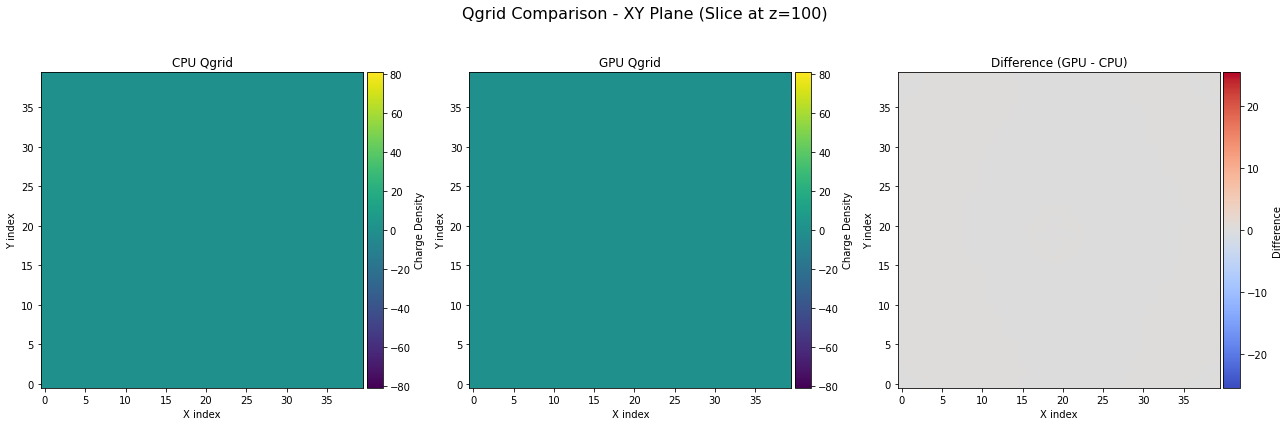

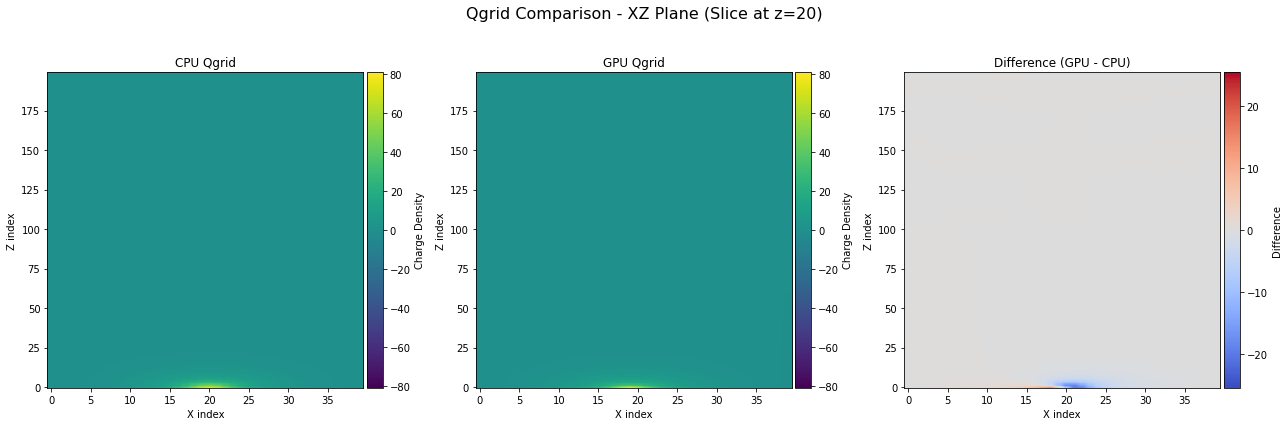

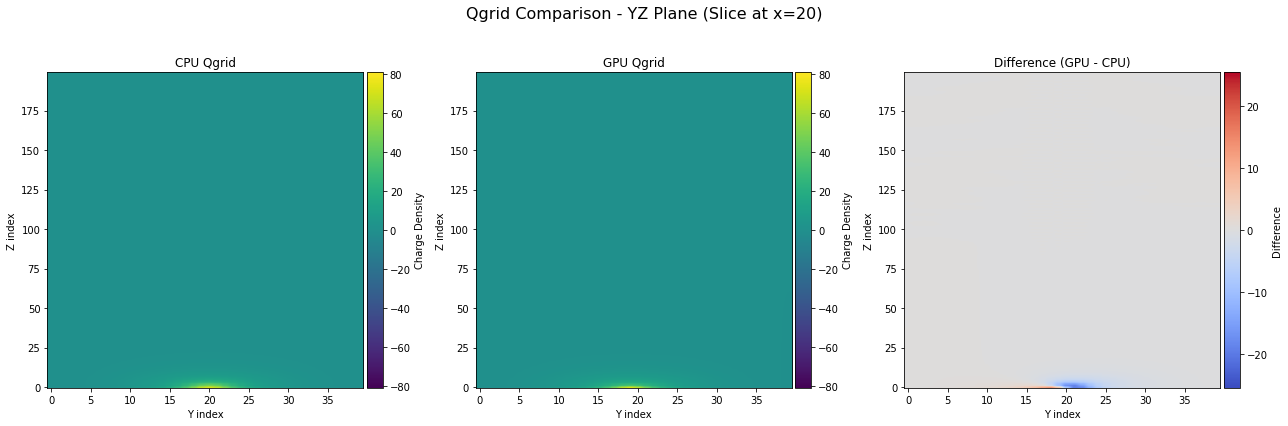


--- Test Numerical Boundary Slice Comparison (CPU vs GPU) ---
Grid dimensions (nz, ny, nx): (200, 40, 40)
Comparing 3 slices from Z-edges.
For XZ/YZ planes, showing 11 elements around center line.
Values formatted to 6 decimal places (scientific notation if small).

--- Test XZ Plane (fixed Y=20, X indices [15:26]) ---
 Z = 0:
   CPU:  18.173221  24.633023  34.767149  49.303007  64.313248  71.192956  64.313248  49.303007  34.767149  24.633023  18.173221
   GPU:  23.023525  31.690674  45.241013  62.087166  70.652504  62.087170  45.241013  31.690676  23.023529  17.342484  13.390198
 Z = 199:
   CPU:  5.335e-08 -3.302e-08  1.084e-07  1.533e-07 -6.911e-07  9.092e-07 -6.911e-07  1.533e-07  1.084e-07 -3.302e-08  5.335e-08
   GPU:  2.032e-07 -1.381e-07 -7.073e-07  1.364e-07  1.194e-06  9.167e-08 -7.535e-07 -1.687e-07  1.790e-07  6.225e-08 -9.229e-08
 Z = 1:
   CPU:  12.999244  17.436844  24.202757  33.742408  43.677970  48.000467  43.677970  33.742408  24.202757  17.436844  12.999244
   GPU:

In [32]:
data_dir = "/home/indranil/git/FireCore/tests/tMMFF/data/"
nacl_dir = os.path.join(data_dir, "NaCl_1x1_L1")

qgrid_cpu = np.load(os.path.join(nacl_dir, "Bspline_PLQd.npy_cpu"))
qgrid_gpu = np.load(os.path.join(nacl_dir, "Bspline_PLQd.npy_gpu"))

pu.compare_qgrids(qgrid_cpu[:,:,:,2].transpose(), qgrid_gpu[:,:,:,2].transpose())
pu.print_qgrid_boundary_slices(qgrid_cpu[:,:,:,2].transpose(), qgrid_gpu[:,:,:,2].transpose(), num_edge_slices=3, num_line_elements=10, title_prefix="Test ")


--- Test Numerical Boundary Slice Comparison (CPU vs GPU) ---
Grid dimensions (nz, ny, nx): (800, 320, 320)
Comparing 3 slices from Z-edges.
For XZ/YZ planes, showing 11 elements around center line.
Values formatted to 6 decimal places (scientific notation if small).

--- Test XZ Plane (fixed Y=160, X indices [155:166]) ---
 Z = 0:
   CPU:   0.000000   0.000000   0.000000   0.002269   0.058988   0.149738   0.058988   0.002269   0.000000   0.000000   0.000000
   GPU:   0.000000   0.000000   0.000000   0.000000   0.000352   0.009154   0.023238   0.009154   0.000352   0.000000   0.000000
 Z = 799:
   CPU:   0.000000   0.000000   0.000000   0.000894   0.023238   0.058988   0.023238   0.000894   0.000000   0.000000   0.000000
   GPU:   0.000000   0.000000   0.000000   0.000000  1.354e-05   0.000352   0.000894   0.000352  1.354e-05   0.000000   0.000000
 Z = 1:
   CPU:   0.000000   0.000000   0.000000   0.000894   0.023238   0.058988   0.023238   0.000894   0.000000   0.000000   0.000000
  

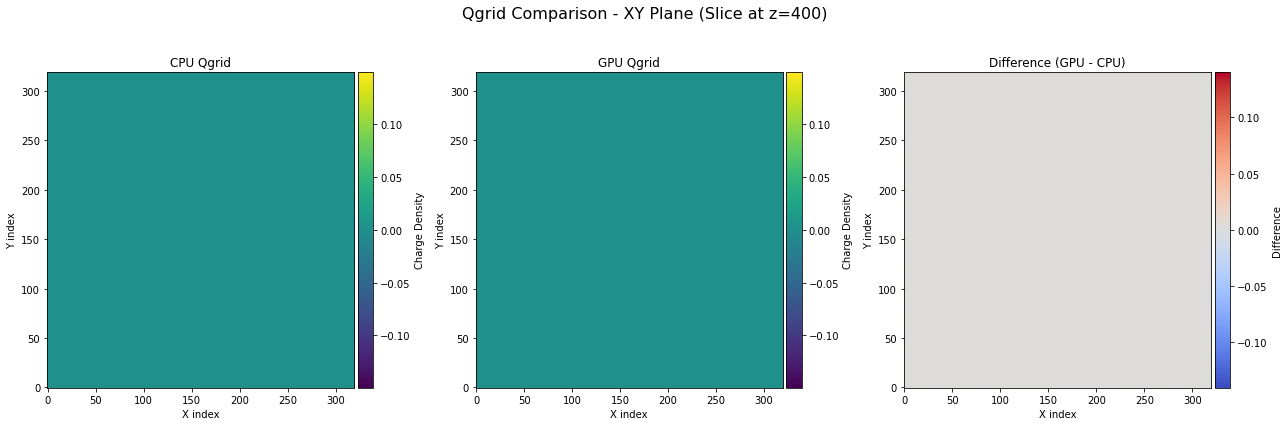

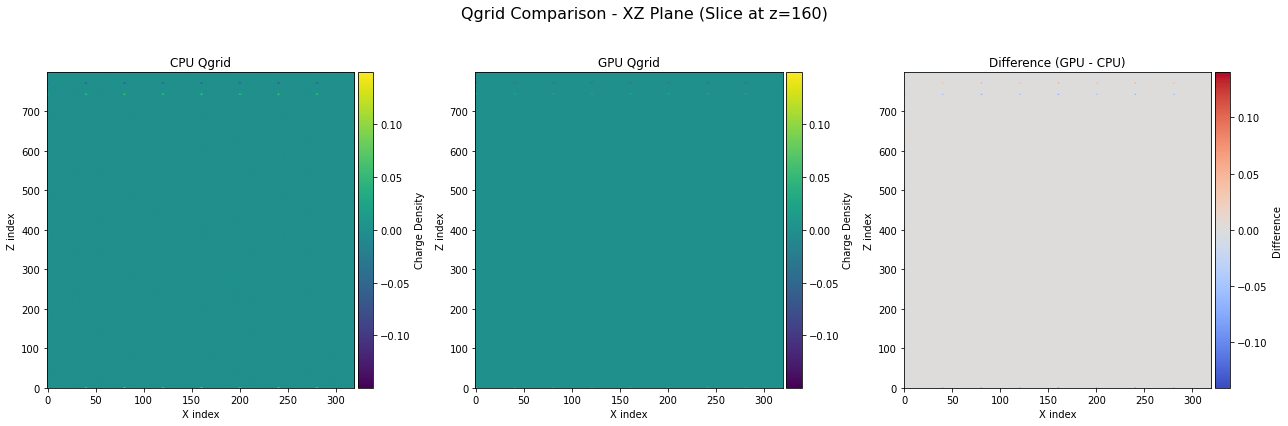

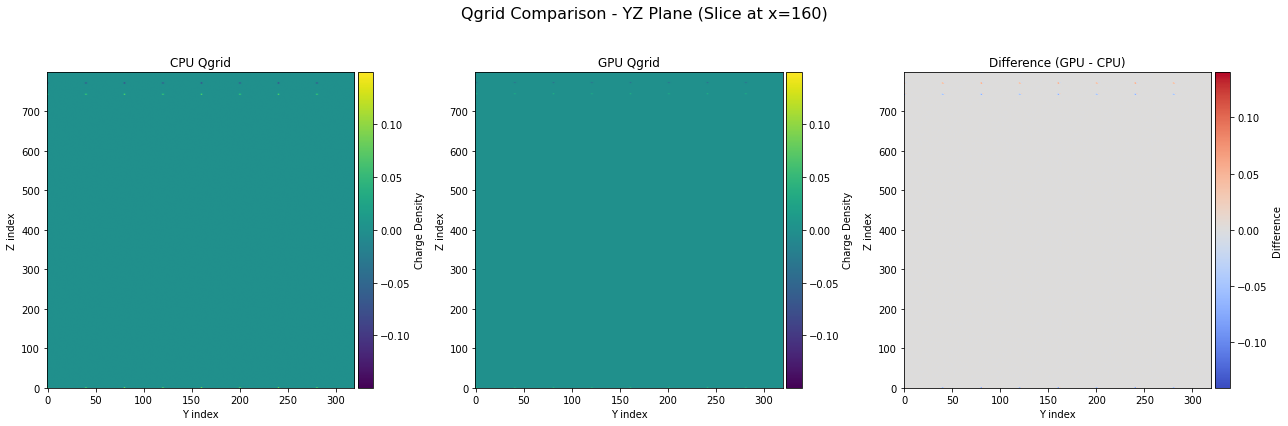

In [47]:
data_dir = "/home/indranil/git/FireCore/tests/tMMFF/data/"
nacl_dir = os.path.join(data_dir, "Na_0.9_Cl_-0.9")

qgrid_cpu = np.load(os.path.join(nacl_dir, "Qgrid.npy"))
qgrid_gpu = np.load(os.path.join(nacl_dir, "Qgrid_gpu.npy"))
qgrid_gpu_1 = np.load(os.path.join(nacl_dir, "Qgrid_gpu_shft.npy"))
pu.print_qgrid_boundary_slices(qgrid_cpu, qgrid_gpu, num_edge_slices=3, num_line_elements=10, title_prefix="Test ")
pu.compare_qgrids(qgrid_cpu, qgrid_gpu)

# pu.print_qgrid_boundary_slices(qgrid_cpu, qgrid_gpu_1, num_edge_slices=3, num_line_elements=10, title_prefix="Test ")
# pu.compare_qgrids(qgrid_cpu, qgrid_gpu_1)

# speed Analysis

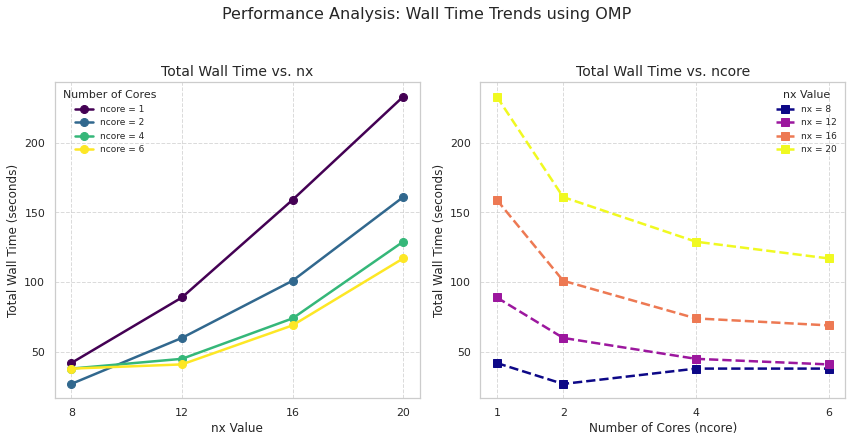

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # numpy is needed for linspace in colormap

# Raw data provided by the user
raw_data = """
ncore=1 nx=8
ncore=1 nx=8 Total wall time: 0:00:42
ncore=1 nx=12
ncore=1 nx=12 Total wall time: 0:01:29
ncore=1 nx=16
ncore=1 nx=16 Total wall time: 0:02:39
ncore=1 nx=20
ncore=1 nx=20 Total wall time: 0:03:53
ncore=2 nx=8
ncore=2 nx=8 Total wall time: 0:00:27
ncore=2 nx=12
ncore=2 nx=12 Total wall time: 0:01:00
ncore=2 nx=16
ncore=2 nx=16 Total wall time: 0:01:41
ncore=2 nx=20
ncore=2 nx=20 Total wall time: 0:02:41
ncore=4 nx=8
ncore=4 nx=8 Total wall time: 0:00:38
ncore=4 nx=12
ncore=4 nx=12 Total wall time: 0:00:45
ncore=4 nx=16
ncore=4 nx=16 Total wall time: 0:01:14
ncore=4 nx=20
ncore=4 nx=20 Total wall time: 0:02:09
ncore=6 nx=8
ncore=6 nx=8 Total wall time: 0:00:38
ncore=6 nx=12
ncore=6 nx=12 Total wall time: 0:00:41
ncore=6 nx=16
ncore=6 nx=16 Total wall time: 0:01:09
ncore=6 nx=20
ncore=6 nx=20 Total wall time: 0:01:57
"""

# Process the raw data into a list of dictionaries
parsed_data = []
lines = raw_data.strip().split('\n')

for i in range(0, len(lines), 2): # Iterate through lines in pairs (config + result)
    config_line = lines[i]
    result_line = lines[i+1] # Assuming the next line always contains the result

    # Extract ncore and nx from the config line
    parts = config_line.split()
    ncore = int(parts[0].split('=')[1])
    nx = int(parts[1].split('=')[1])

    # Extract wall time from the result line
    time_str = result_line.split('Total wall time: ')[1]
    
    # Convert time string (e.g., "0:00:42" or "0:01:29") to seconds
    time_parts = list(map(int, time_str.split(':')))
    if len(time_parts) == 3: # H:MM:SS
        total_seconds = time_parts[0] * 3600 + time_parts[1] * 60 + time_parts[2]
    elif len(time_parts) == 2: # MM:SS (assuming no hours if only 2 parts)
        total_seconds = time_parts[0] * 60 + time_parts[1]
    else:
        total_seconds = 0 # Handle unexpected formats, though not expected here

    parsed_data.append({
        'ncore': ncore,
        'nx': nx,
        'wall_time_seconds': total_seconds
    })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(parsed_data)

# --- Create the plots ---
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# --- Plot 1: Wall Time vs. nx (grouped by ncore) ---
# Get unique ncore values to iterate through for the first plot
unique_ncores = df['ncore'].unique()
colors_ncore = plt.cm.viridis(np.linspace(0, 1, len(unique_ncores)))

for i, ncore_val in enumerate(unique_ncores):
    subset_df = df[df['ncore'] == ncore_val]
    axes[0].plot(
        subset_df['nx'],
        subset_df['wall_time_seconds'],
        marker='o',          # Add circular markers for data points
        linestyle='-',       # Solid lines
        color=colors_ncore[i],     # Assign color from the colormap
        linewidth=2.5,       # Thicker lines
        markersize=8,        # Larger markers
        label=f'ncore = {ncore_val}' # Label for the legend
    )

axes[0].set_title('Total Wall Time vs. nx', fontsize=14)
axes[0].set_xlabel('nx Value', fontsize=12)
axes[0].set_ylabel('Total Wall Time (seconds)', fontsize=12)
axes[0].set_xticks(df['nx'].unique()) # Ensure ticks are at unique nx values
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title='Number of Cores', title_fontsize='11', fontsize='9', loc='best')

# --- Plot 2: Wall Time vs. ncore (grouped by nx) ---
# Get unique nx values to iterate through for the second plot
unique_nxs = df['nx'].unique()
colors_nx = plt.cm.plasma(np.linspace(0, 1, len(unique_nxs))) # Using a different colormap for distinction

for i, nx_val in enumerate(unique_nxs):
    subset_df = df[df['nx'] == nx_val]
    axes[1].plot(
        subset_df['ncore'],
        subset_df['wall_time_seconds'],
        marker='s',          # Use square markers for distinction
        linestyle='--',      # Use dashed lines for distinction
        color=colors_nx[i],  # Assign color from the colormap
        linewidth=2.5,       # Thicker lines
        markersize=8,        # Larger markers
        label=f'nx = {nx_val}' # Label for the legend
    )

axes[1].set_title('Total Wall Time vs. ncore', fontsize=14)
axes[1].set_xlabel('Number of Cores (ncore)', fontsize=12)
axes[1].set_ylabel('Total Wall Time (seconds)', fontsize=12)
axes[1].set_xticks(df['ncore'].unique()) # Ensure ticks are at unique ncore values
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title='nx Value', title_fontsize='11', fontsize='9', loc='best')


# Adjust layout to prevent labels from overlapping and add a main title
plt.suptitle('Performance Analysis: Wall Time Trends using OMP', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make room for suptitle


# Save the plot to a file
# plt.savefig('performance_plot.png')
# print("Data processed and plots generated successfully.")
# print("The combined plot has been saved as 'performance_plot.png'.")
# print("\nDataFrame head:")
# print(df.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # numpy is needed for linspace in colormap

# Raw data provided by the user
raw_data = """
ncore=1 nx=8
ncore=1 nx=8 Total wall time: 0:00:41
ncore=1 nx=12
ncore=1 nx=12 Total wall time: 0:01:30
ncore=1 nx=16
ncore=1 nx=16 Total wall time: 0:02:33
ncore=1 nx=20
ncore=1 nx=20 Total wall time: 0:03:55
ncore=2 nx=8
ncore=2 nx=8 Total wall time: 0:00:38
ncore=2 nx=12
ncore=2 nx=12 Total wall time: 0:01:14
ncore=2 nx=16
ncore=2 nx=16 Total wall time: 0:01:30
ncore=2 nx=20
ncore=2 nx=20 Total wall time: 0:02:14
ncore=4 nx=8
ncore=4 nx=8 Total wall time: 0:00:23
ncore=4 nx=12
ncore=4 nx=12 Total wall time: 0:00:47
ncore=4 nx=16
ncore=4 nx=16 Total wall time: 0:00:59
ncore=4 nx=20
ncore=4 nx=20 Total wall time: 0:01:49
ncore=6 nx=8
ncore=6 nx=8 Total wall time: 0:00:23
ncore=6 nx=12
ncore=6 nx=12 Total wall time: 0:00:48
ncore=6 nx=16
ncore=6 nx=16 Total wall time: 0:00:52
ncore=6 nx=20
ncore=6 nx=20 Total wall time: 0:01:38
"""

# Process the raw data into a list of dictionaries
parsed_data = []
lines = raw_data.strip().split('\n')

for i in range(0, len(lines), 2): # Iterate through lines in pairs (config + result)
    config_line = lines[i]
    result_line = lines[i+1] # Assuming the next line always contains the result

    # Extract ncore and nx from the config line
    parts = config_line.split()
    ncore = int(parts[0].split('=')[1])
    nx = int(parts[1].split('=')[1])

    # Extract wall time from the result line
    time_str = result_line.split('Total wall time: ')[1]
    
    # Convert time string (e.g., "0:00:42" or "0:01:29") to seconds
    time_parts = list(map(int, time_str.split(':')))
    if len(time_parts) == 3: # H:MM:SS
        total_seconds = time_parts[0] * 3600 + time_parts[1] * 60 + time_parts[2]
    elif len(time_parts) == 2: # MM:SS (assuming no hours if only 2 parts)
        total_seconds = time_parts[0] * 60 + time_parts[1]
    else:
        total_seconds = 0 # Handle unexpected formats, though not expected here

    parsed_data.append({
        'ncore': ncore,
        'nx': nx,
        'wall_time_seconds': total_seconds
    })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(parsed_data)

# --- Create the plots ---
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# --- Plot 1: Wall Time vs. nx (grouped by ncore) ---
# Get unique ncore values to iterate through for the first plot
unique_ncores = df['ncore'].unique()
colors_ncore = plt.cm.viridis(np.linspace(0, 1, len(unique_ncores)))

for i, ncore_val in enumerate(unique_ncores):
    subset_df = df[df['ncore'] == ncore_val]
    axes[0].plot(
        subset_df['nx'],
        subset_df['wall_time_seconds'],
        marker='o',          # Add circular markers for data points
        linestyle='-',       # Solid lines
        color=colors_ncore[i],     # Assign color from the colormap
        linewidth=2.5,       # Thicker lines
        markersize=8,        # Larger markers
        label=f'ncore = {ncore_val}' # Label for the legend
    )

axes[0].set_title('Total Wall Time vs. nx', fontsize=14)
axes[0].set_xlabel('nx Value', fontsize=12)
axes[0].set_ylabel('Total Wall Time (seconds)', fontsize=12)
axes[0].set_xticks(df['nx'].unique()) # Ensure ticks are at unique nx values
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title='Number of Cores', title_fontsize='11', fontsize='9', loc='best')

# --- Plot 2: Wall Time vs. ncore (grouped by nx) ---
# Get unique nx values to iterate through for the second plot
unique_nxs = df['nx'].unique()
colors_nx = plt.cm.plasma(np.linspace(0, 1, len(unique_nxs))) # Using a different colormap for distinction

for i, nx_val in enumerate(unique_nxs):
    subset_df = df[df['nx'] == nx_val]
    axes[1].plot(
        subset_df['ncore'],
        subset_df['wall_time_seconds'],
        marker='s',          # Use square markers for distinction
        linestyle='--',      # Use dashed lines for distinction
        color=colors_nx[i],  # Assign color from the colormap
        linewidth=2.5,       # Thicker lines
        markersize=8,        # Larger markers
        label=f'nx = {nx_val}' # Label for the legend
    )

axes[1].set_title('Total Wall Time vs. ncore', fontsize=14)
axes[1].set_xlabel('Number of Cores (ncore)', fontsize=12)
axes[1].set_ylabel('Total Wall Time (seconds)', fontsize=12)
axes[1].set_xticks(df['ncore'].unique()) # Ensure ticks are at unique ncore values
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title='nx Value', title_fontsize='11', fontsize='9', loc='best')


# Adjust layout to prevent labels from overlapping and add a main title
plt.suptitle('Performance Analysis: Wall Time Trends using MPI', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make room for suptitle


# Save the plot to a file
# plt.savefig('performance_plot.png')
# print("Data processed and plots generated successfully.")
# print("The combined plot has been saved as 'performance_plot.png'.")
# print("\nDataFrame head:")
# print(df.head())
